**Übung Mustererkennung** *WS 2022/23* -- *K. Brandenbusch,  Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
___
# Aufgabe 4a: Mischverteilungsklassifikator mit klassenunabhängigen Komponentendichten

Statt einer Normalverteilung pro Klasse bietet es sich häufig an, mehrere Verteilungen vorzusehen. Nutzen Sie die in Aufgabe 3 berechneten Cluster und schätzten Sie für jedes Cluster eine Normalverteilung.<br>
Verwenden Sie diese Normalverteilungen als Komponenten eines Mischverteilungsmodells und erstellen Sie mit dessen Hilfe einen Mischverteilungsklassifikator.

In dieser Aufgabe soll zuerst ein Mischverteilungsklassifiktor mit klassenunabhängigen Komponentendichten realisiert werden. Anschließend sollen Sie in Aufgabe 4b einen Mischverteilungsklassifikator mit klassenabhängigen Komponentendichten implementaieren.

Die Klasenbedingten Dichten sollen durch eine Mischverteilung auf der Basis von Normalverteilungsdichten modelliert werden:

$$
    \large p(\underline{c}|\Omega_\kappa) = \sum_{l=1}^{L}p_{\kappa,l}\mathcal{N}(\underline{c}|\underline{\mu}_l,\Sigma_l) \tag*{mit $\large \sum_{l=1}^{L} p_{\kappa,l} = 1, \forall \kappa$.}
$$

$\large \kappa $ ist hier der Index der Klasse und $\large L$ die Anzahl der Komponenten.

---

Zuerst müssen die benötigten Module importiert und der Datensatz geladen werden.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
if '..' not in sys.path:
    sys.path.append('..')

from common import visualization
from common import log_math
from common.data_provider import DataProvider
from common.vector_quantization import Lloyd

# Trainingsdaten mit Labels laden
train_data_provider = DataProvider(DataProvider.DATA2DROOT_TRAIN)
train_data, train_labels = train_data_provider.get_dataset_and_labels()

---
## Berechnung der Komponentendichten

Verwenden Sie die in Aufgabe 3 implementierte Methode `Lloyd.cluster()` aus dem Modul [`common.vector_quantization`](../common/vector_quantization.py), um ein Kodebuch zu berechnen.<br>
Berechnen Sie anschließend eine Normalverteilung pro Cluster und visualisieren Sie diese.

Überlegen Sie, wie Normalverteilungen definiert sind und wie Sie die nötigen Paramter auf Grundlage der Quantisierung bestimmen können.

Nützliche Funktionen:
 - [np.mean](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
 - [np.cov](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
 - [visualization.plot_norm_dist_ellipse](../common/visualization.py) (zur Visualisierung)


[[  -5.06501993   -2.63945706   -3.10959443 ...  -10.93460121
   -19.82178439  -35.64386266]
 [  -9.35633248   -1.58203147   -5.44529692 ...  -12.12039295
   -24.30335636  -40.62493622]
 [ -11.5785794    -6.33659719   -1.07865025 ...  -22.24978325
    -9.21309393  -21.33017532]
 ...
 [  -7.29377301  -10.06597107  -32.55385749 ...   -1.79686272
   -68.87239376  -89.65428162]
 [  -3.64275015  -22.55374413  -41.70841946 ...   -4.24343069
   -96.7271778  -119.36387994]
 [  -6.74267789  -14.26805582  -39.11444621 ...   -1.52214827
   -79.94764378 -101.21563337]]


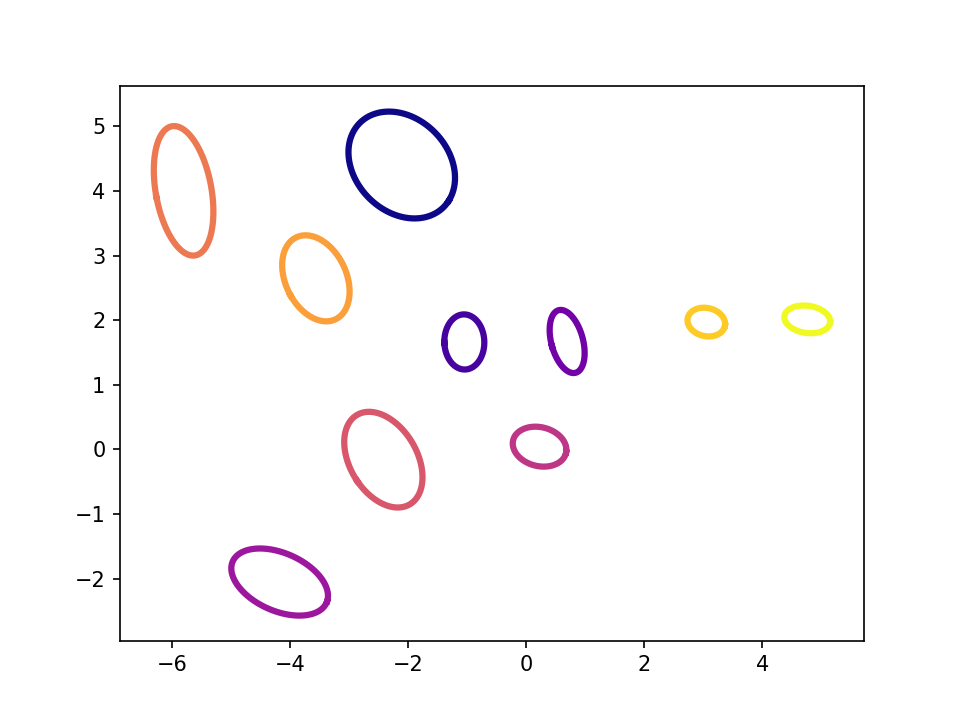

In [2]:
from common.vector_quantization import Lloyd
from common.visualization import plot_norm_dist_ellipse as plot_dists
import common.log_math
codeWordsSize = 10

iloydi = Lloyd()
means, calc_labels = iloydi.cluster(train_data, codeWordsSize, False, False)
covs = []
for i in range(len(np.unique(calc_labels))):
    class_data = train_data[calc_labels==i]
    #class_data = train_data_provider.get_class_arr(class_idx=i)
    mean = means[i]
    cov = np.dot(np.transpose(class_data-mean), class_data-mean) / (class_data.shape[0]-1)
    covs.append(cov)
    #print(f"mean: {mean} | cov: {cov}")

distis = log_math.log_normal_distr(train_data, means, covs)
print(distis)

#print disties
colormap = cm.get_cmap("plasma")(np.linspace(0, 1, len(means)))
_, ax = plt.subplots(dpi=150)
plot_dists(ax, means, covs, colormap)


---
## Zuordnung der Beispiele zu den Komponentendichten

Bisher erfolgte die Zuordnung der Daten zu den Kodewörtern auf Basis ihrer Distanz zu den Kodewörtern.<br>
Ordnen Sie nun die Beispiele der Normalverteilung zu, welche diese mit größter Likelihood generiert und visualisieren Sie die Zuordnung.<br>

**Optional:** Visualisieren Sie zusätzlich, bei welchen Datenpunkten sich die Zuordnung geändert hat.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

[1 1 2 ... 7 0 7]
['0' '0' '0' ... '2' '2' '2']


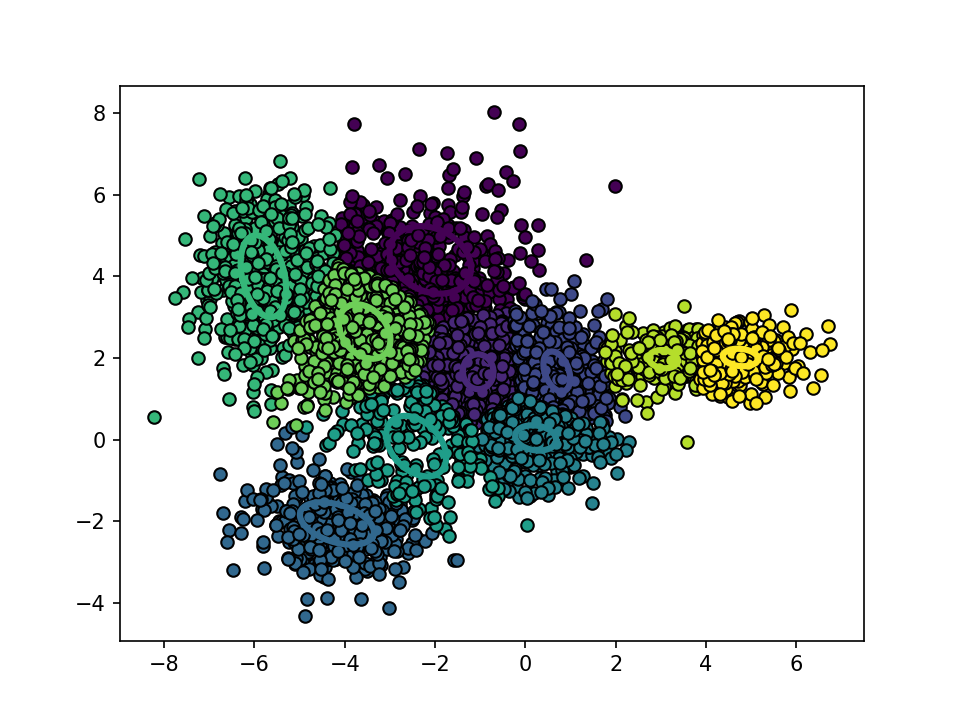

In [3]:
training_labels = np.zeros(len(train_data), dtype=int)
for i in range(len(train_data)):
    training_labels[i] = distis[i].argmax()
print(training_labels)
print(train_labels)

#plotten
_, ax = plt.subplots(dpi=150)
colormap = cm.get_cmap("viridis")(np.linspace(0, 1, len(means)))

for i in range(len(means)):
    data = train_data[training_labels==i]
    ax.scatter(data[:, 0], data[:, 1], c=colormap[i], edgecolor='k')  

plot_dists(ax, means, covs, colormap)


---
## Gewichtung der Komponentendichten

Damit aus den Komponentendichten eine gültige Mischverteilung erstellt werden kann, müssen die Komponentendichten gewichtet werden mit $\large \sum_{l=1}^{L} p_{\kappa,l} = 1, \forall \kappa $.<br>
Berechnen Sie nun $\large p_{\kappa,l} $ für alle Klassen und Komponenten.<br>
Visualisieren Sie anschließend in jeweils einem Plot die Daten aus der Stichprobe einer Klasse und die Gewichtung $\large p_{\kappa,l} $ aller Komponenten für die jeweilige Klasse.

In derselben Schleife können Sie bereits die a-priori Wahrscheinlichkeit $\large p_\kappa $ der drei Klassen berechnen.

In [9]:
uniqueClusters = np.sort(np.unique(training_labels))
print(uniqueClusters)
uniqueClasses = np.sort(np.unique(train_labels))
print(uniqueClasses)
aPriori = []
PklWeights = np.zeros((len(uniqueClusters),len(uniqueClasses)),dtype=float)

for k in range(len(uniqueClasses)):
    anzahl_class = sum(train_labels==uniqueClasses[k])
    aPriori.append(anzahl_class/len(train_data))
    for l in range(len(means)):
        anzahl_class_cluster =  sum(np.logical_and(train_labels==uniqueClasses[k], training_labels == uniqueClusters[l]))
        PklWeights[l][k] = (anzahl_class_cluster / anzahl_class)
print(PklWeights)



[0 1 2 3 4 5 6 7 8 9]
['0' '1' '2']
[[0.01274363 0.         0.29685157]
 [0.27436282 0.         0.1011994 ]
 [0.30734633 0.00224888 0.01124438]
 [0.         0.30134933 0.00449775]
 [0.32608696 0.         0.00449775]
 [0.05472264 0.03523238 0.06671664]
 [0.         0.32158921 0.10869565]
 [0.00374813 0.00149925 0.40629685]
 [0.02098951 0.15817091 0.        ]
 [0.         0.17991004 0.        ]]


---
## Anwendung der Entscheidungsregel

Basierend auf den zuvor berechneten Parametern können Sie nun die klassenbedingten Dichten $\large p(\underline{c}|\Omega_\kappa) $ für gegebene Merkmalsvektoren $\large \underline{c} $ auswerten.<br>
Laden Sie den Testdatensatz und klassifizieren Sie alle Beispiele. Die Entscheidungsregel lautet wie in Aufgabe 2:

$$
    \large \lambda = \underset{\kappa \in \{1,\dots,K\}}{\text{argmax}} p_\kappa p(\underline{c}|\Omega_\kappa).
$$

In [10]:
test_data_provider = DataProvider(DataProvider.DATA2DROOT_TEST)
test_data, test_labels_gt = test_data_provider.get_dataset_and_labels()
#np.array(PklWeights) np.log(PklWeights) +
testDistis =  log_math.log_normal_distr(test_data,means,covs)
print(testDistis.shape)
aPosteriori = []
test_label_calc = np.zeros(len(test_data))
for i in range(len(test_data)):
    summe = []
    print(len(means))
    for j in range(len(means)):
        InneraPosteriori = np.log(PklWeights[j]) + testDistis[i][j]
        print(InneraPosteriori)
        summe.append(InneraPosteriori[j]) 
    aPosteriori.append(log_math.logsumexp(sum))
    test_label_calc[i] =  (np.log(aPriori) + aPosteriori).argmax()
print(aPosteriori)

(1998, 10)
10
[-8.47214626        -inf -5.32394539]
[-4.74275834        -inf -5.7401169 ]
[ -5.50076376 -10.41830863  -8.80887072]
[        -inf -44.29058425 -48.49527686]


C:\Users\marce\AppData\Local\Temp\ipykernel_632\3681038584.py:12: RuntimeWarning: divide by zero encountered in log
  InneraPosteriori = np.log(PklWeights[j]) + testDistis[i][j]


IndexError: index 3 is out of bounds for axis 0 with size 3

---
## Evaluation des Klassifikators

Bewerten Sie die Klassifikationsergebnisse mit dem `ClassificationEvaluator` aus dem Modul [`common.classification`](../common/classification.py).

**Optional:** Plotten Sie die Trainings- und die Testdaten und kennzeichnen Sie farblich die zugehörige bzw. zugewiesene Klasse.

---
## Implementierung des Klassifikators

Implementieren Sie basierend auf dem bishererigen Code die Klasse `MDClassifierClassIndep` im Modul [`common.classification`](../common/classification.py):

Überlegen Sie, welche Parameter für einen Mischverteilungsklassifikator (mit klassenunabhängigen Komponentendichten) für die Klassifikation benötigt werden.<br>
Legen Sie Variablen für diese Parameter an und initialisieren Sie diese in der Methode `MDClassifierClassIndep.__init__()`.<br>
In der Methode `MDClassifierClassIndep.estimate()` sollen diese Parameter basierend auf den übergebenen Trainingsdaten geschätzt werden.<br>
Die Methode `MDClassifierClassIndep.classify()` soll Klassenlabels (nicht die IDs der Klassen!) für die übergebenen Merkmalsvektoren vorhersagen.

Instanzieren Sie den von Ihnen implementierten Klassifikator und trainieren Sie diesen. Testen Sie diesen anschließend auf den Testdaten.<br>
Bewerten Sie die Klassifikation und vergleichen diese mit den zuvor erhaltenen Ergebnissen.